In [1]:
%matplotlib inline

try:
    xrange
except NameError:
    xrange = range

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

<h2>ダミーデータを作ります</h2>

ダミーデータは可視化しやすいように、2次元とします。そしてダミーデータを作る上に2次元正規分布からサンプリングしますが、そのための関数を用意します。

In [2]:
def generate_2dim_normal(mean, variance, covariance, sample_size):
    cov = [[variance, covariance],
           [covariance, variance]]
    return np.random.multivariate_normal(mean, cov, sample_size)

4つのクラスターを作ります。

In [3]:
cluster1 = generate_2dim_normal(mean=[0, 8], variance=1,
                                covariance=0, sample_size=500)
cluster2 = generate_2dim_normal(mean=[-1, 0], variance=1,
                                covariance=0, sample_size=500)
cluster3 = generate_2dim_normal(mean=[10, 10], variance=1,
                                covariance=0, sample_size=300)
cluster4 = generate_2dim_normal(mean=[5, 5.5], variance=0.8,
                                covariance=-0.1, sample_size=200)
data = np.vstack((cluster1, cluster2, cluster3, cluster4))

それを可視化したのが以下です。

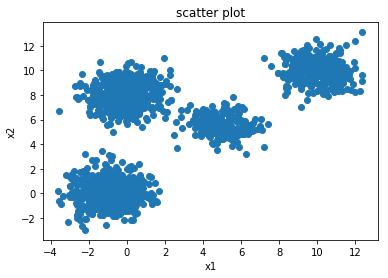

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:, 0], data[:, 1])
ax.set_title('scatter plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

　Scikit-LearnのKMeans法を使ってクラスターを作ってみましょう。

In [5]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)

In [6]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
cluster_labels = km.predict(data)

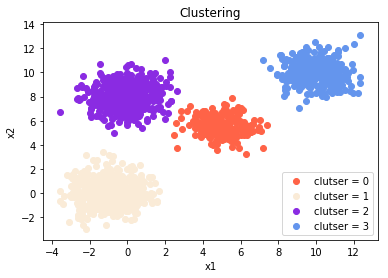

In [8]:
#　グラフの描画の初期化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colorlist = ['tomato', 'antiquewhite', 'blueviolet', 'cornflowerblue',
             'darkgreen', 'seashell', 'skyblue', 'mediumseagreen']

#　クラスターの番号をユニークにします
cluster_ids = list(set(cluster_labels))
# cluster_idsは[0, 1, 2, 3]となっています

#　クラスターごとに色を変えながら、散布図に出力していきます
for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'clutser = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:, 0], data_by_cluster[:, 1],
               c=colorlist[k], label=label_)

ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

<h2>最適なクラスター数を探す: Elbow Method</h2>

In [ ]:
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(data)
    intra_sum_of_square_list.append(km.inertia_)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

<h2>最適なクラスター数を探す: シルエットプロット</h2>

In [ ]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(data)
cluster_labels = km.predict(data)

In [ ]:
silhouette_avg = silhouette_score(data, cluster_labels)

In [ ]:
each_silhouette_score = silhouette_samples(data, cluster_labels,
                                           metric='euclidean')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
         each_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colorlist[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.3)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title('Silhouette plot')
ax.set_xlabel('Silhouette score')
ax.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', linestyle='--')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cluster_ids = list(set(cluster_labels))

for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'clutser = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:, 0], data_by_cluster[:, 1],
               c=colorlist[k], label=label_)

ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

<h2>実際のデータを使ってやってみましょう</h2>

本日使用するデータはこちらから入手しました。
http://archive.ics.uci.edu/ml/datasets/Wholesale+customers#

datasetフォルダのWholesale_customers_data.csvを読み込みましょう。

In [ ]:
wholsesale_data = pd.read_csv('dataset/Wholesale_customers_data.csv')

上記のウェブページから抜粋したのが以下です。ポルトガルの卸売業者のカテゴリ別のSpending仕入量？のデータです。このデータを使って、卸売業者をセグメンテーションしてみましょう。

Abstract: The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

*	FRESH: annual spending (m.u.) on fresh products (Continuous); 
*	MILK: annual spending (m.u.) on milk products (Continuous); 
*	GROCERY: annual spending (m.u.)on grocery products (Continuous); 
*	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
*	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
*	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
*	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
*	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

In [ ]:
wholsesale_data.head()

まず、気になるのはChannelとReginがカテゴリ変数だということです。KMeans法は連続値を想定しているということです。そのため、ChannelとReginは外しましょう。

In [ ]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
        'Delicassen']

In [ ]:
dataset_for_cl = wholsesale_data[cols]
dataset_for_cl.head()

忘れてはいけないのが前処理。ユークリッド距離に基づいてクラスタリングするので、スケールは重要。

In [ ]:
# scaler = StandardScaler()
scaler = MaxAbsScaler()
dataset_for_cl_scaled = scaler.fit_transform(dataset_for_cl)

Elbow Methodを使って最適なクラスター数を探してみましょう。

In [ ]:
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(dataset_for_cl)
    intra_sum_of_square_list.append(km.inertia_)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

シルエットプロットも見てみましょう。

In [ ]:
n_clusters = 6
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(dataset_for_cl_scaled)
cluster_labels = km.predict(dataset_for_cl_scaled)

silhouette_avg = silhouette_score(dataset_for_cl_scaled, cluster_labels)

each_silhouette_score = silhouette_samples(dataset_for_cl_scaled,
                                           cluster_labels, metric='euclidean')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

y_lower = 10

for i in range(n_clusters):
        ith_cluster_silhouette_values = \
         each_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colorlist[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.3)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title('Silhouette plot')
ax.set_xlabel('Silhouette score')
ax.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', linestyle='--')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

最後に解釈してみましょう！

In [ ]:
km_centers = pd.DataFrame(km.cluster_centers_, columns=cols)
km_centers.plot.bar(ylim=[0, 2], fontsize=10)
km_centers